In [1]:
%pip install geopandas
%apt install libspatialindex-dev
%pip install rtree


Note: you may need to restart the kernel to use updated packages.


UsageError: Line magic function `%apt` not found.


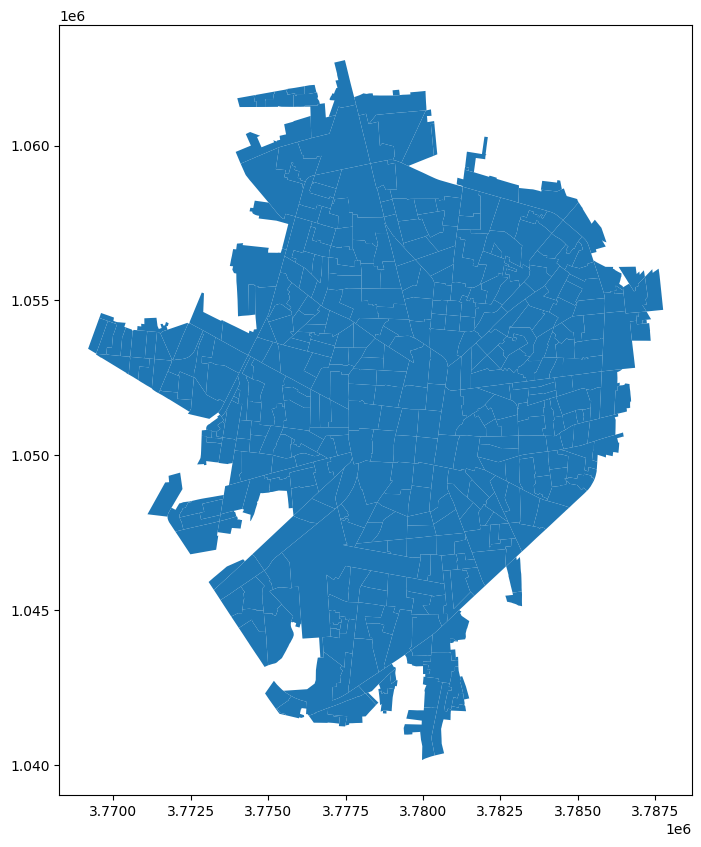

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Lista de rutas a tus archivos SHP
shp_files2010 = [
    '310500001\\310500001A.shp'
    # Añade todas las rutas a tus archivos
]

# Cargar cada archivo SHP como un GeoDataFrame y almacenarlos en una lista
gdfs2010 = [gpd.read_file(shp) for shp in shp_files2010]

# Visualización básica: Graficar cada GeoDataFrame en un solo plot para comparar
fig, ax = plt.subplots(figsize=(10, 10))
for gdfs2010 in gdfs2010:
    gdfs2010.plot(ax=ax)

plt.show()


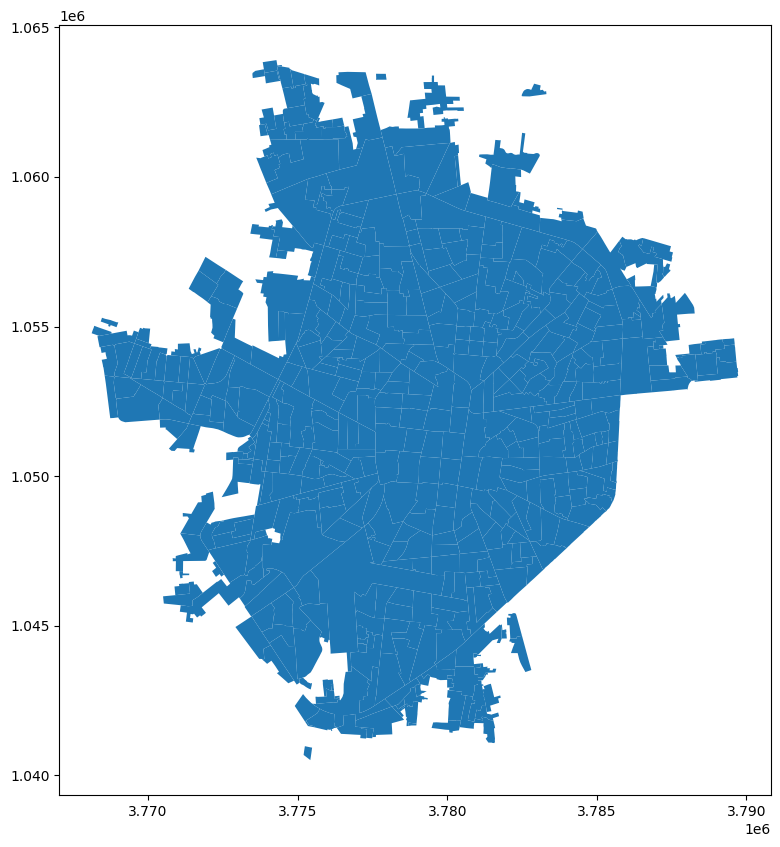

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Lista de rutas a tus archivos SHP
shp_files2020 = [
    '31050_vla_ne_mg_2022\\310500001\conjunto_de_datos\\310500001a.shp'
    # Añade todas las rutas a tus archivos
]

# Cargar cada archivo SHP como un GeoDataFrame y almacenarlos en una lista
gdfs = [gpd.read_file(shp) for shp in shp_files2020]

# Visualización básica: Graficar cada GeoDataFrame en un solo plot para comparar
fig, ax = plt.subplots(figsize=(10, 10))
for gdf in gdfs:
    gdf.plot(ax=ax)

plt.show()


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


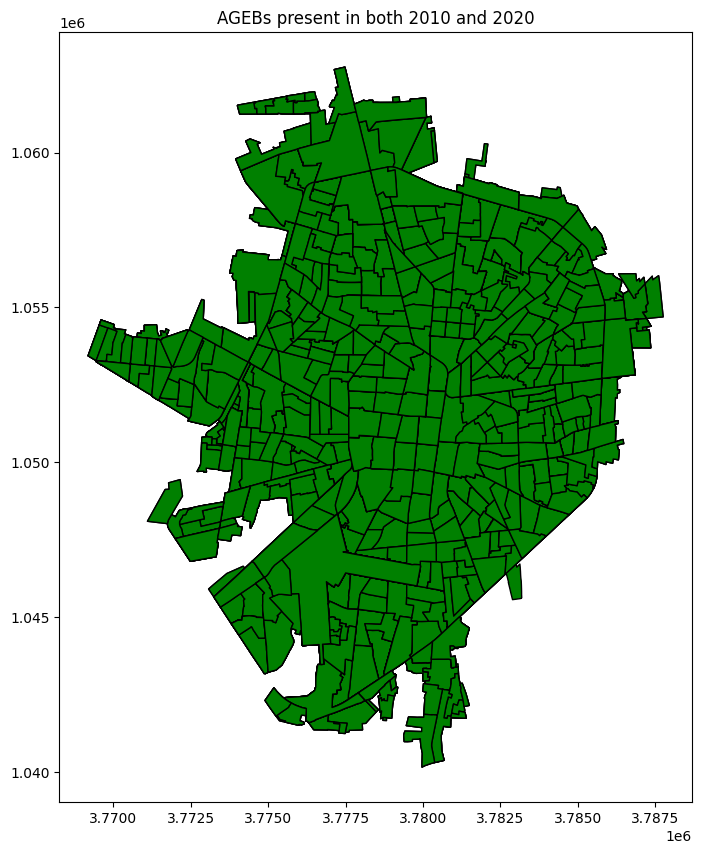

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Paths to your shapefile directories
shp_2010_path = '310500001\\310500001A.shp'  # Update this to your 2010 SHP file path
shp_2020_path = '31050_vla_ne_mg_2022\\310500001\\conjunto_de_datos\\310500001a.shp'  # Update this to your 2020 SHP file path

# Load the shapefiles
agebs_2010 = gpd.read_file(shp_2010_path)
agebs_2020 = gpd.read_file(shp_2020_path)

# Ensure both GeoDataFrames use the same CRS
agebs_2020 = agebs_2020.to_crs(agebs_2010.crs)

# Perform a spatial join to find AGEBs from 2010 that exist in the 2020 data
matching_agebs = gpd.sjoin(agebs_2010, agebs_2020, how="inner", op="intersects")

# Visualization
fig, ax = plt.subplots(figsize=(10, 10))
matching_agebs.plot(ax=ax, color='green', edgecolor='black')
plt.title('AGEBs present in both 2010 and 2020')
plt.show()


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


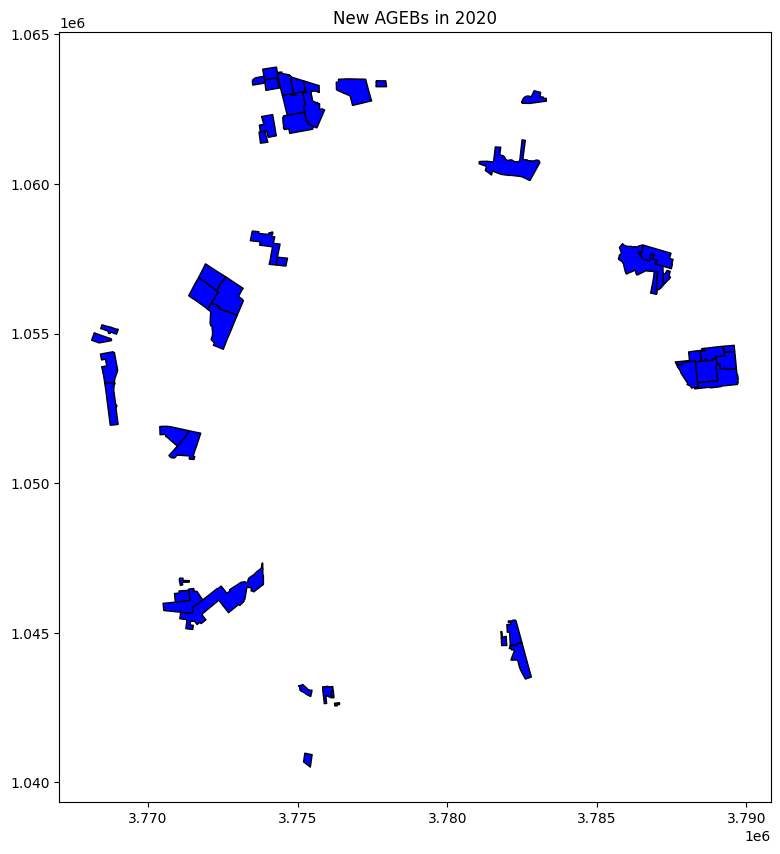

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Paths to your shapefile directories
shp_2010_path = '310500001\\310500001A.shp'  # Update this with your 2010 SHP file path
shp_2020_path = '31050_vla_ne_mg_2022\\310500001\\conjunto_de_datos\\310500001a.shp'  # Update this with your 2020 SHP file path

# Load the shapefiles
agebs_2010 = gpd.read_file(shp_2010_path)
agebs_2020 = gpd.read_file(shp_2020_path)

# Ensure both GeoDataFrames use the same CRS
agebs_2020 = agebs_2020.to_crs(agebs_2010.crs)

# Perform a spatial join to identify 2020 AGEBs that do NOT intersect with 2010 AGEBs
# First, perform a left join, which includes all 2020 AGEBs
potential_new_agebs = gpd.sjoin(agebs_2020, agebs_2010, how="left", op="intersects")

# Now, filter out those that found a match in 2010, leaving only the new AGEBs
new_agebs = potential_new_agebs[potential_new_agebs['index_right'].isna()]

# Visualization
fig, ax = plt.subplots(figsize=(10, 10))
new_agebs.plot(ax=ax, color='blue', edgecolor='black')
plt.title('New AGEBs in 2020')
plt.show()


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


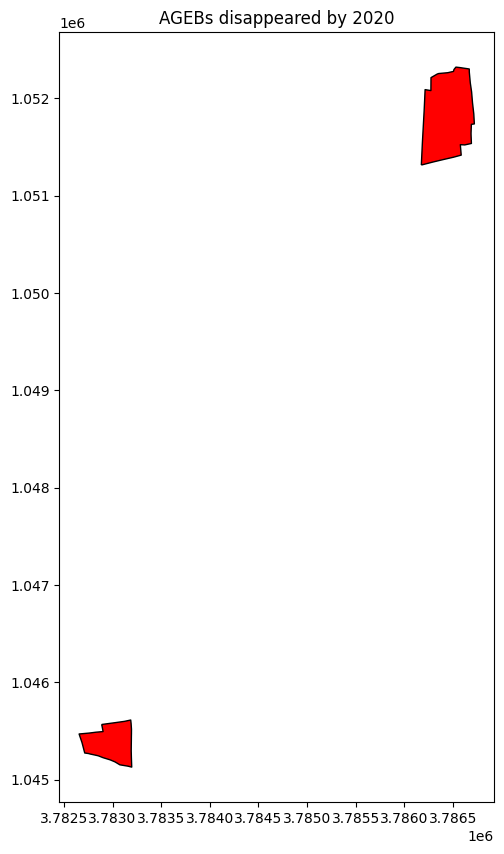

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Paths to your shapefile directories
shp_2010_path = '310500001\\310500001A.shp'  # Update this with your 2010 SHP file path
shp_2020_path = '31050_vla_ne_mg_2022\\310500001\\conjunto_de_datos\\310500001a.shp'  # Update this with your 2020 SHP file path

# Load the shapefiles
agebs_2010 = gpd.read_file(shp_2010_path)
agebs_2020 = gpd.read_file(shp_2020_path)

# Ensure both GeoDataFrames use the same CRS
agebs_2020 = agebs_2020.to_crs(agebs_2010.crs)

# Perform a spatial join to identify 2010 AGEBs that do NOT intersect with 2020 AGEBs
# First, perform a left join, which includes all 2010 AGEBs
potential_disappeared_agebs = gpd.sjoin(agebs_2010, agebs_2020, how="left", op="intersects")

# Now, filter out those that found a match in 2020, leaving only the disappeared AGEBs
disappeared_agebs = potential_disappeared_agebs[potential_disappeared_agebs['index_right'].isna()]

# Visualization
fig, ax = plt.subplots(figsize=(10, 10))
disappeared_agebs.plot(ax=ax, color='red', edgecolor='black')
plt.title('AGEBs disappeared by 2020')
plt.show()
